In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np
from astropy.timeseries import LombScargle
from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

rcParams['font.sans-serif'] = ['Times']
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.utils import io
from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']


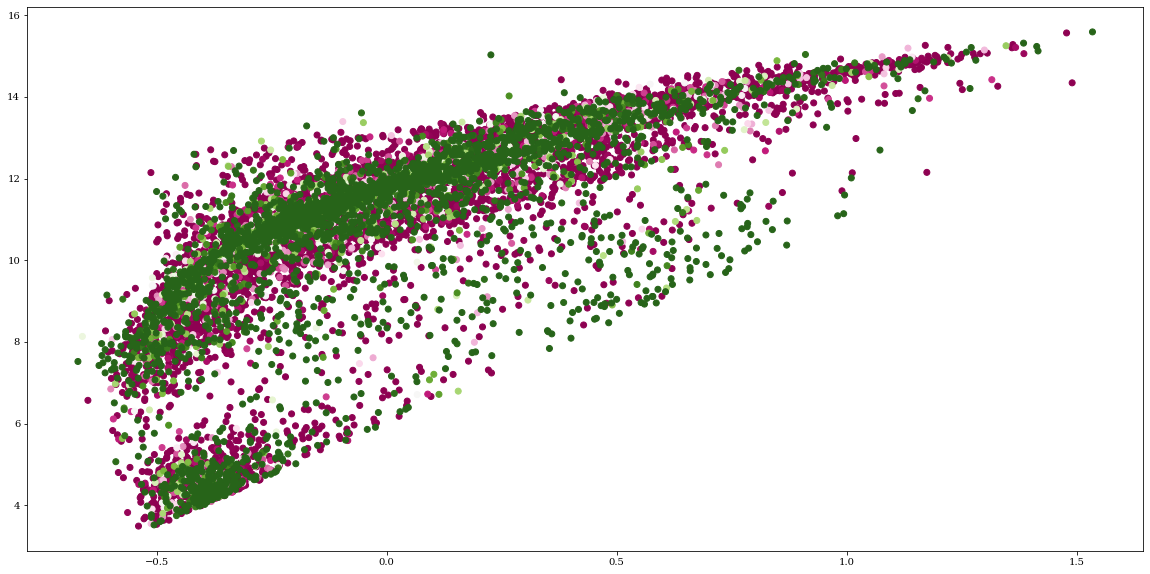

In [24]:
HRD = pd.read_csv('forHRTESSFilled.csv',sep=',',header=None)
#proba = HRD[8].to_numpy()
#print(np.argwhere(np.isnan(proba)))
HRDClean = HRD[HRD[8] != -999]
Parallax = HRDClean[3].to_numpy()
Gmag = HRDClean[4].to_numpy()
BPmag = HRDClean[5].to_numpy()
RPmag = HRDClean[6].to_numpy()
Gmag = Gmag + 5*(np.log10(Parallax/1000)+1)
proba = HRDClean[8].to_numpy()
cm = plt.cm.get_cmap('PiYG')
sortIndi = proba.argsort()[::-1][:len(proba)]
probaS = proba[sortIndi]
BPMagS = BPmag[sortIndi]
RPMagS = RPmag[sortIndi]
GmagS = Gmag[sortIndi]
probaS = np.abs(probaS - 1)
plt.figure(figsize=(20,10))
plt.scatter(BPMagS-RPMagS, GmagS, c=probaS, marker='o', cmap=cm)
#plt.ylim(18,6)

10774 10774


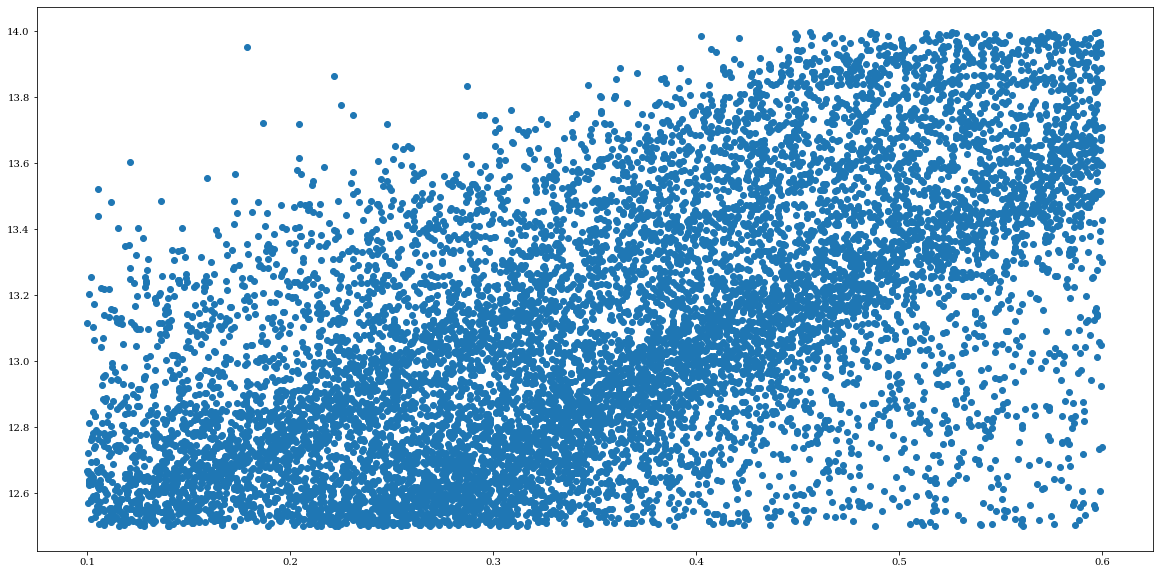

In [18]:
HRD = pd.read_csv('forHRTESSFilled.csv',sep=',',header=None)
#proba = HRD[8].to_numpy()
#print(np.argwhere(np.isnan(proba)))
Parallax = HRD[3].to_numpy()
Gmag = HRD[4].to_numpy()
BPmag = HRD[5].to_numpy()
RPmag = HRD[6].to_numpy()
Gmag = Gmag + 5*(np.log10(Parallax/1000)+1)

BPRPArr = BPmag-RPmag
filter_arr = BPRPArr > 0.1
BPRPArrCut = BPRPArr[filter_arr]
GmagCut = Gmag[filter_arr]
filter_arr = BPRPArrCut < 0.6
BPRPArrCut = BPRPArrCut[filter_arr]
GmagCut = GmagCut[filter_arr]
filter_arr = GmagCut > 12.5
BPRPArrCut = BPRPArrCut[filter_arr]
GmagCut = GmagCut[filter_arr]
filter_arr = GmagCut < 14
BPRPArrCut = BPRPArrCut[filter_arr]
GmagCut = GmagCut[filter_arr]
print(len(BPRPArrCut), len(GmagCut))
plt.figure(figsize=(20,10))
plt.scatter(BPRPArrCut, GmagCut, marker='o', cmap=cm)
BPRPAllKeep = BPRPArrCut
GmagAllKeep = GmagCut


315 315


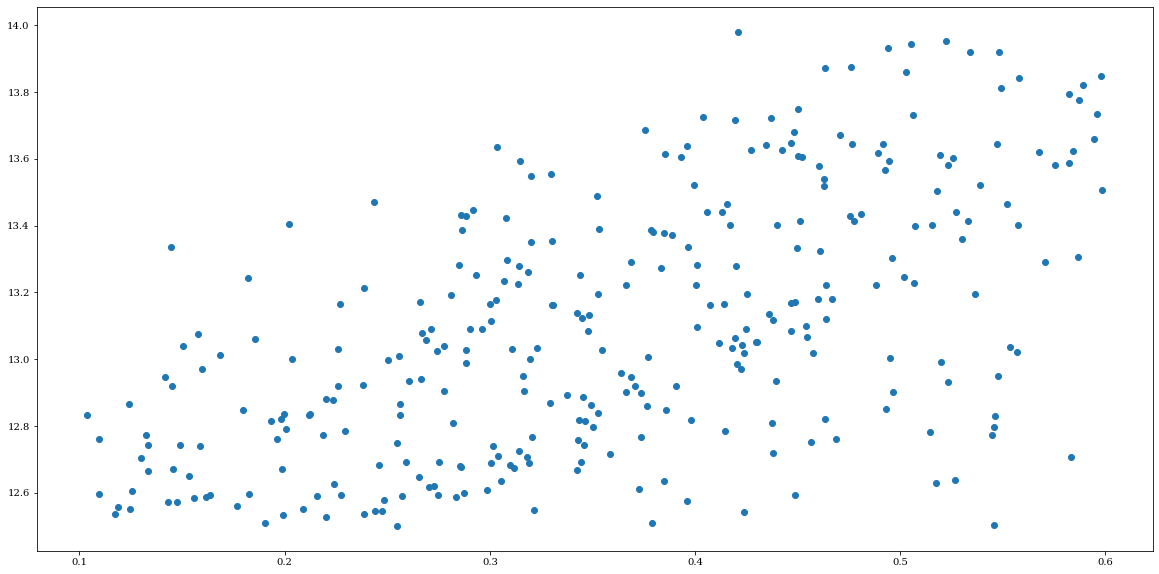

In [17]:
BPRPArr = BPMagS-RPMagS
filter_arr = BPRPArr > 0.1
BPRPArrCut = BPRPArr[filter_arr]
GmagCut = GmagS[filter_arr]
probaCut = probaS[filter_arr]
filter_arr = BPRPArrCut < 0.6
BPRPArrCut = BPRPArrCut[filter_arr]
GmagCut = GmagCut[filter_arr]
probaCut = probaCut[filter_arr]
filter_arr = probaCut > 0.99
probaCut = probaCut[filter_arr]
BPRPArrCut = BPRPArrCut[filter_arr]
GmagCut = GmagCut[filter_arr]
filter_arr = GmagCut > 12.5
BPRPArrCut = BPRPArrCut[filter_arr]
probaCut = probaCut[filter_arr]
GmagCut = GmagCut[filter_arr]
filter_arr = GmagCut < 14
BPRPArrCut = BPRPArrCut[filter_arr]
probaCut = probaCut[filter_arr]
GmagCut = GmagCut[filter_arr]
print(len(BPRPArrCut), len(GmagCut))
plt.figure(figsize=(20,10))
plt.scatter(BPRPArrCut, GmagCut, marker='o', cmap=cm)
BPRPTessKeep = BPRPArrCut
GmagTessKeep = GmagCut

2486 2486


(-0.6, 1.2999)

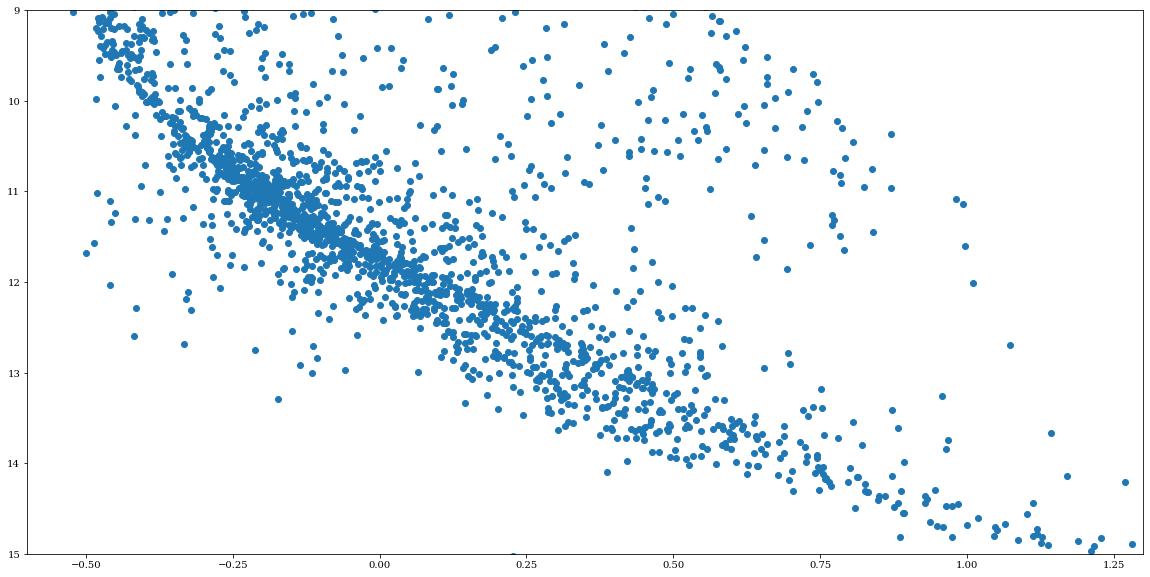

In [23]:
BPRPArr = BPMagS-RPMagS
filter_arr = probaS > 0.99
BPRPArrCut = BPRPArr[filter_arr]
GmagCut = GmagS[filter_arr]
probaCut = probaS[filter_arr]

print(len(BPRPArrCut), len(GmagCut))
plt.figure(figsize=(20,10))
plt.scatter(BPRPArrCut, GmagCut, marker='o', cmap=cm)
BPRPTessVariable = BPRPArrCut
GmagTessVariable = GmagCut
np.save('BPRPTessVariable.npy', BPRPTessVariable)
np.save('GmagTessVariable.npy', GmagTessVariable)
plt.ylim(15,9)
plt.xlim(-0.6,1.2999)

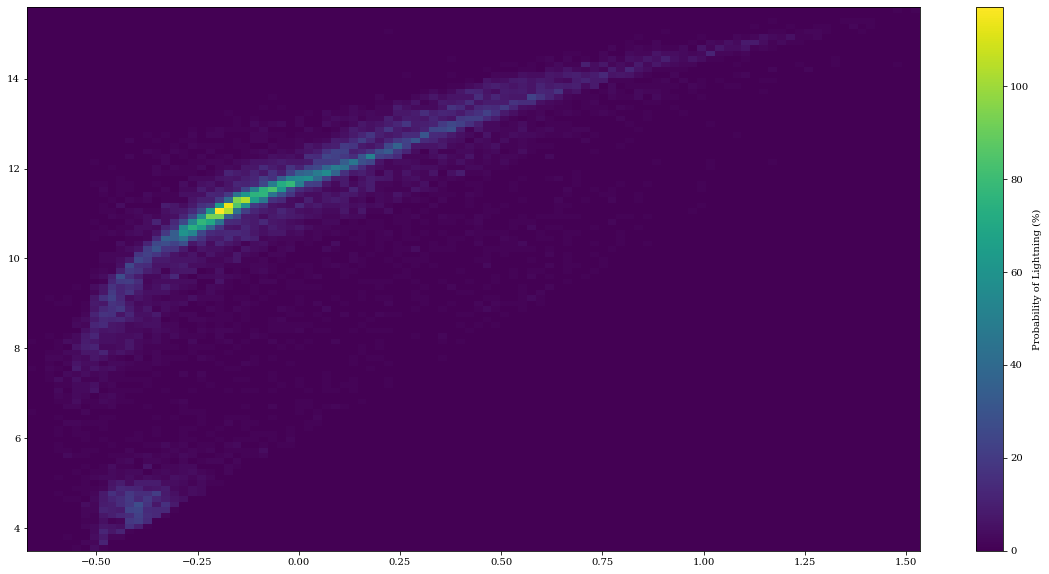

In [25]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

#Plot 2D histogram using pcolor
plt.figure(figsize=(20,10))
plt.pcolormesh(xedges,yedges,H)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability of Lightning (%)')

plt.show()

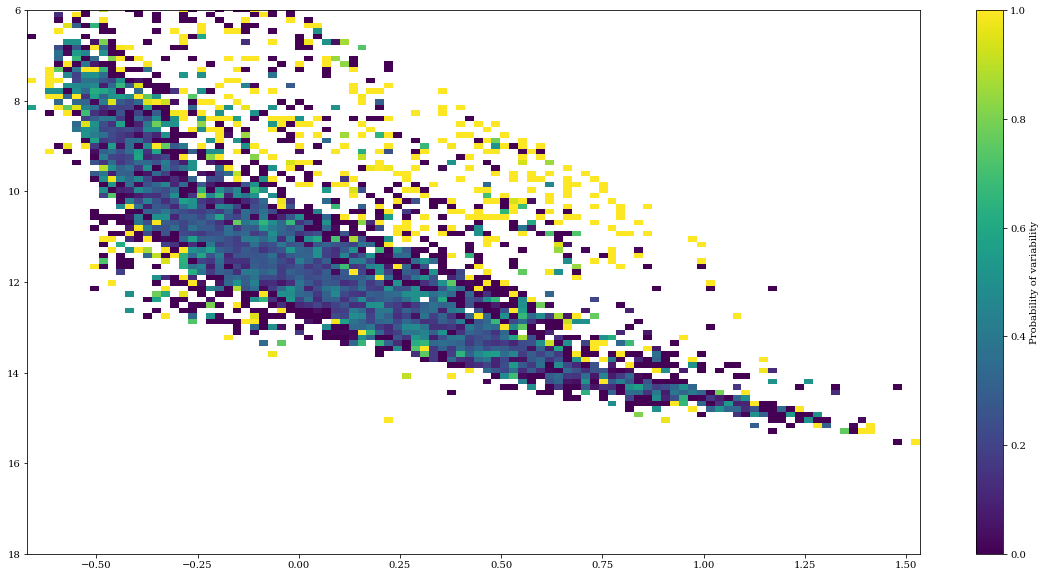

In [26]:
# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

# now 'avgarr' contains the averages (NaNs for no-sample bins)


#Plot 2D histogram using pcolor
plt.figure(figsize=(20,10))
plt.pcolormesh(xedges,yedges,avgarr)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability of variability')
plt.ylim(18,6)
plt.show()

In [27]:
values = np.nan_to_num(avgarr, nan=0.0)

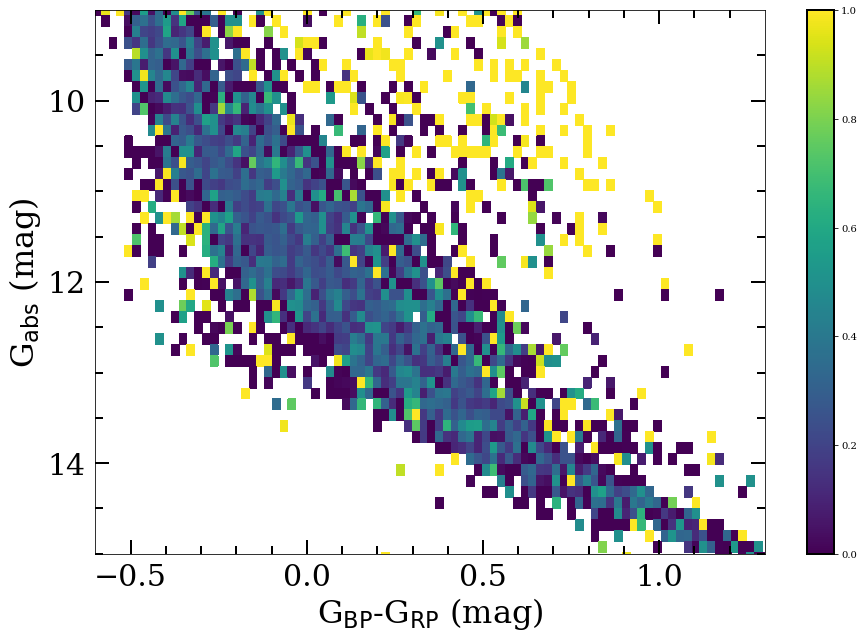

In [5]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']


c = axs.pcolormesh(xedges,yedges,avgarr)
fig.colorbar(c, ax=axs)

axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 


#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])
bboxx = transforms.Bbox([[0.66, 0.22], [13., 8.9]])#285->288 #15.15->
plt.savefig('TessSample.pdf', bbox_inches=bboxx ) 

<IPython.core.display.Javascript object>


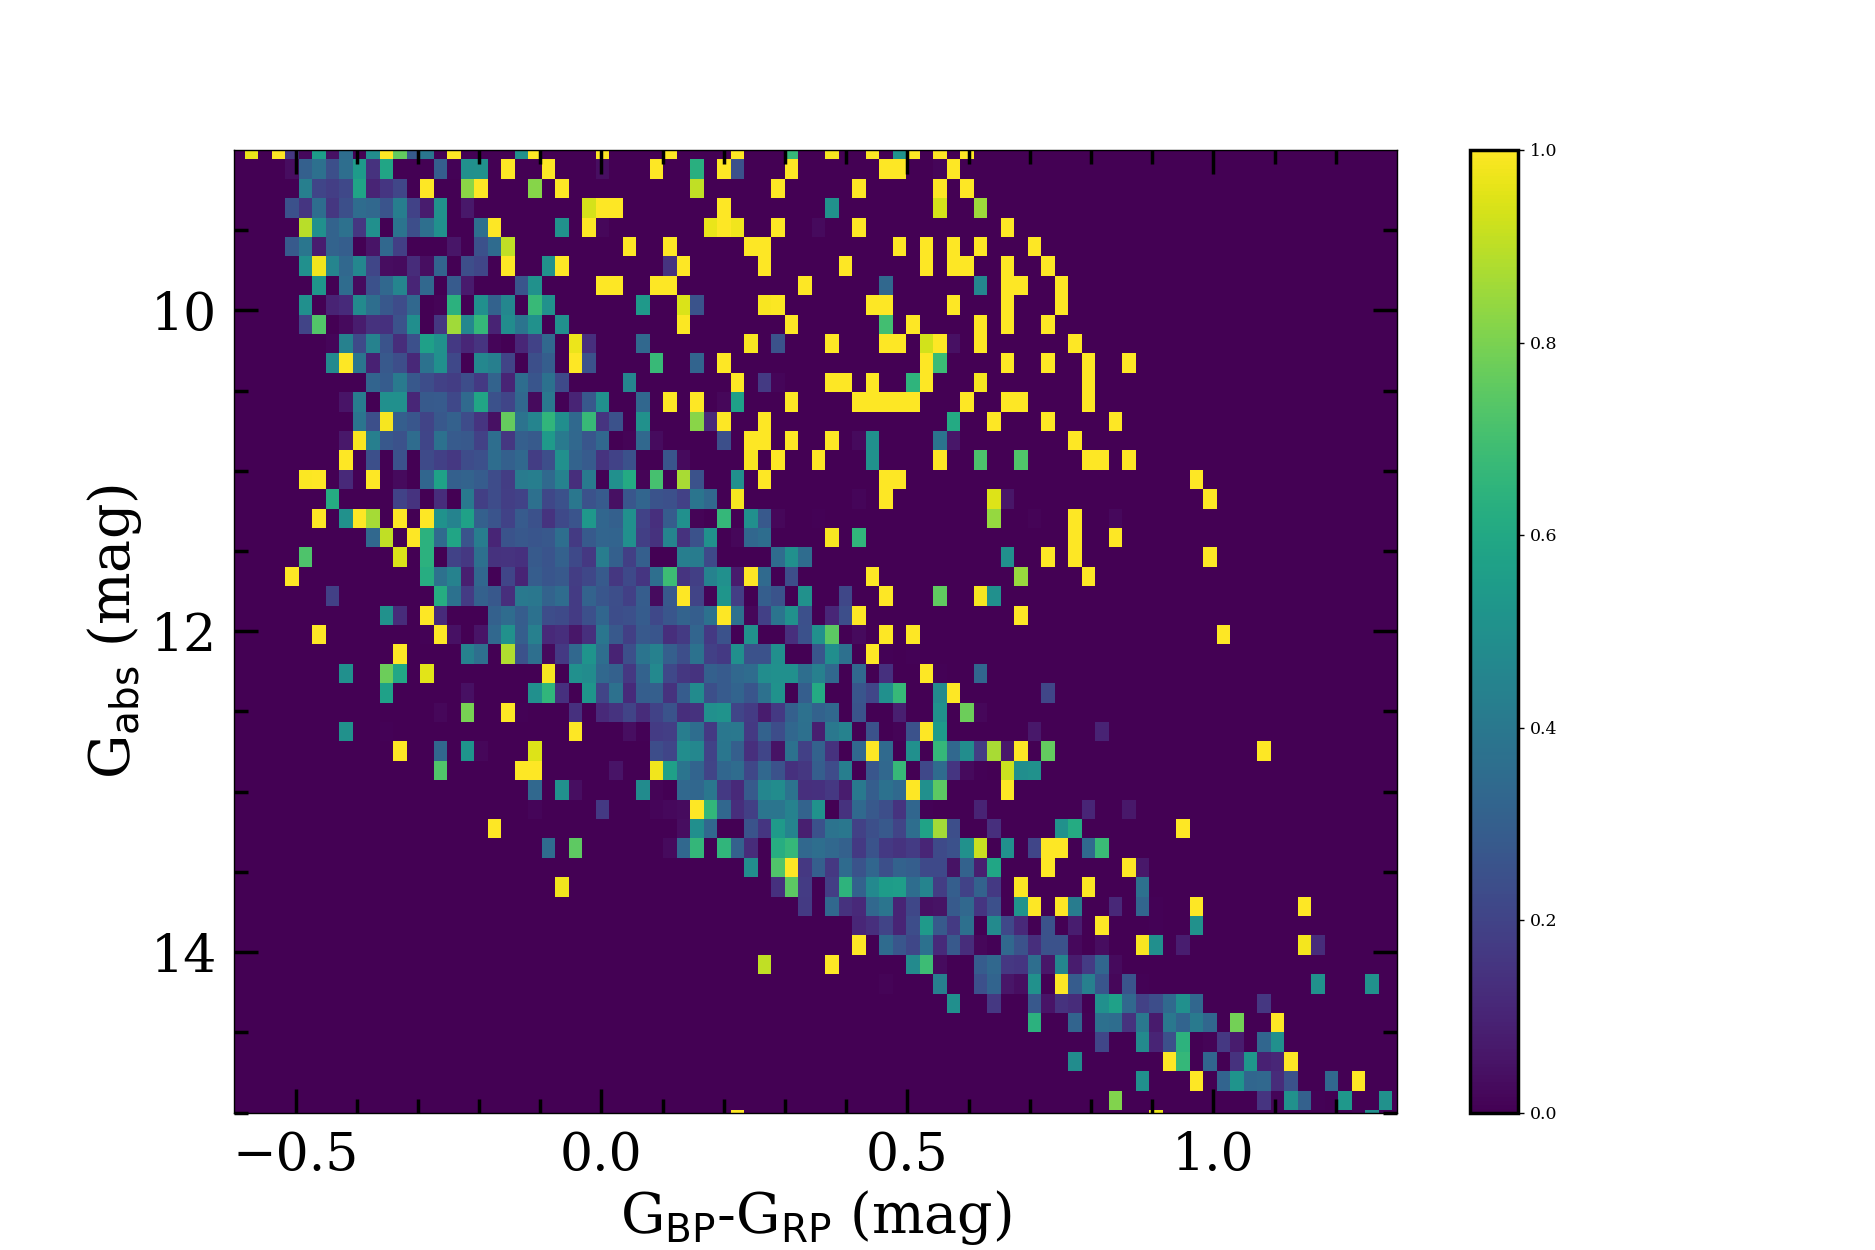

In [33]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']


c = axs.pcolormesh(xedges,yedges,values)
fig.colorbar(c, ax=axs)

axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 


#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])
bboxx = transforms.Bbox([[0.66, 0.22], [13., 8.9]])#285->288 #15.15->
#plt.savefig('TessSample.pdf', bbox_inches=bboxx ) 

In [13]:
len(values)

100

In [18]:
import scipy.stats as stats
from matplotlib.pyplot import imshow

# Create some dummy data
data = values+0.00001*np.random.rand(100, 100)
kde = stats.gaussian_kde(data)

In [22]:
x_flat

array([1.44560129e-07, 7.82060889e-03, 1.56410732e-02, 2.34615376e-02,
       3.12820019e-02, 3.91024662e-02, 4.69229305e-02, 5.47433949e-02,
       6.25638592e-02, 7.03843235e-02, 7.82047879e-02, 8.60252522e-02,
       9.38457165e-02, 1.01666181e-01, 1.09486645e-01, 1.17307110e-01,
       1.25127574e-01, 1.32948038e-01, 1.40768502e-01, 1.48588967e-01,
       1.56409431e-01, 1.64229895e-01, 1.72050360e-01, 1.79870824e-01,
       1.87691288e-01, 1.95511753e-01, 2.03332217e-01, 2.11152681e-01,
       2.18973146e-01, 2.26793610e-01, 2.34614074e-01, 2.42434539e-01,
       2.50255003e-01, 2.58075467e-01, 2.65895932e-01, 2.73716396e-01,
       2.81536860e-01, 2.89357325e-01, 2.97177789e-01, 3.04998253e-01,
       3.12818718e-01, 3.20639182e-01, 3.28459646e-01, 3.36280111e-01,
       3.44100575e-01, 3.51921039e-01, 3.59741504e-01, 3.67561968e-01,
       3.75382432e-01, 3.83202897e-01, 3.91023361e-01, 3.98843825e-01,
       4.06664290e-01, 4.14484754e-01, 4.22305218e-01, 4.30125683e-01,
      

In [27]:
np.shape(values)

(100, 100)

In [32]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()

cfset = ax.contourf(xedges[:-1],yedges[:-1],values,levels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap='coolwarm')
#ax.imshow(np.rot90(values), cmap='coolwarm')
#cset = ax.contour(xedges[:-1],yedges[:-1],values, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlim(-0.6,1.2999)
ax.set_ylim(15,9)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

<IPython.core.display.Javascript object>

NameError: name 'cset' is not defined

In [57]:
x,y = np.meshgrid(np.linspace(0,100,100), np.linspace(0,100,100))
data = values+0.00001*np.random.rand(100, 100)
kde = stats.gaussian_kde(data)

positions = np.vstack([x.ravel(), y.ravel()])
f = np.reshape(kde(positions).T, x.shape)

ValueError: points have dimension 2, dataset has dimension 100

(99, 0)

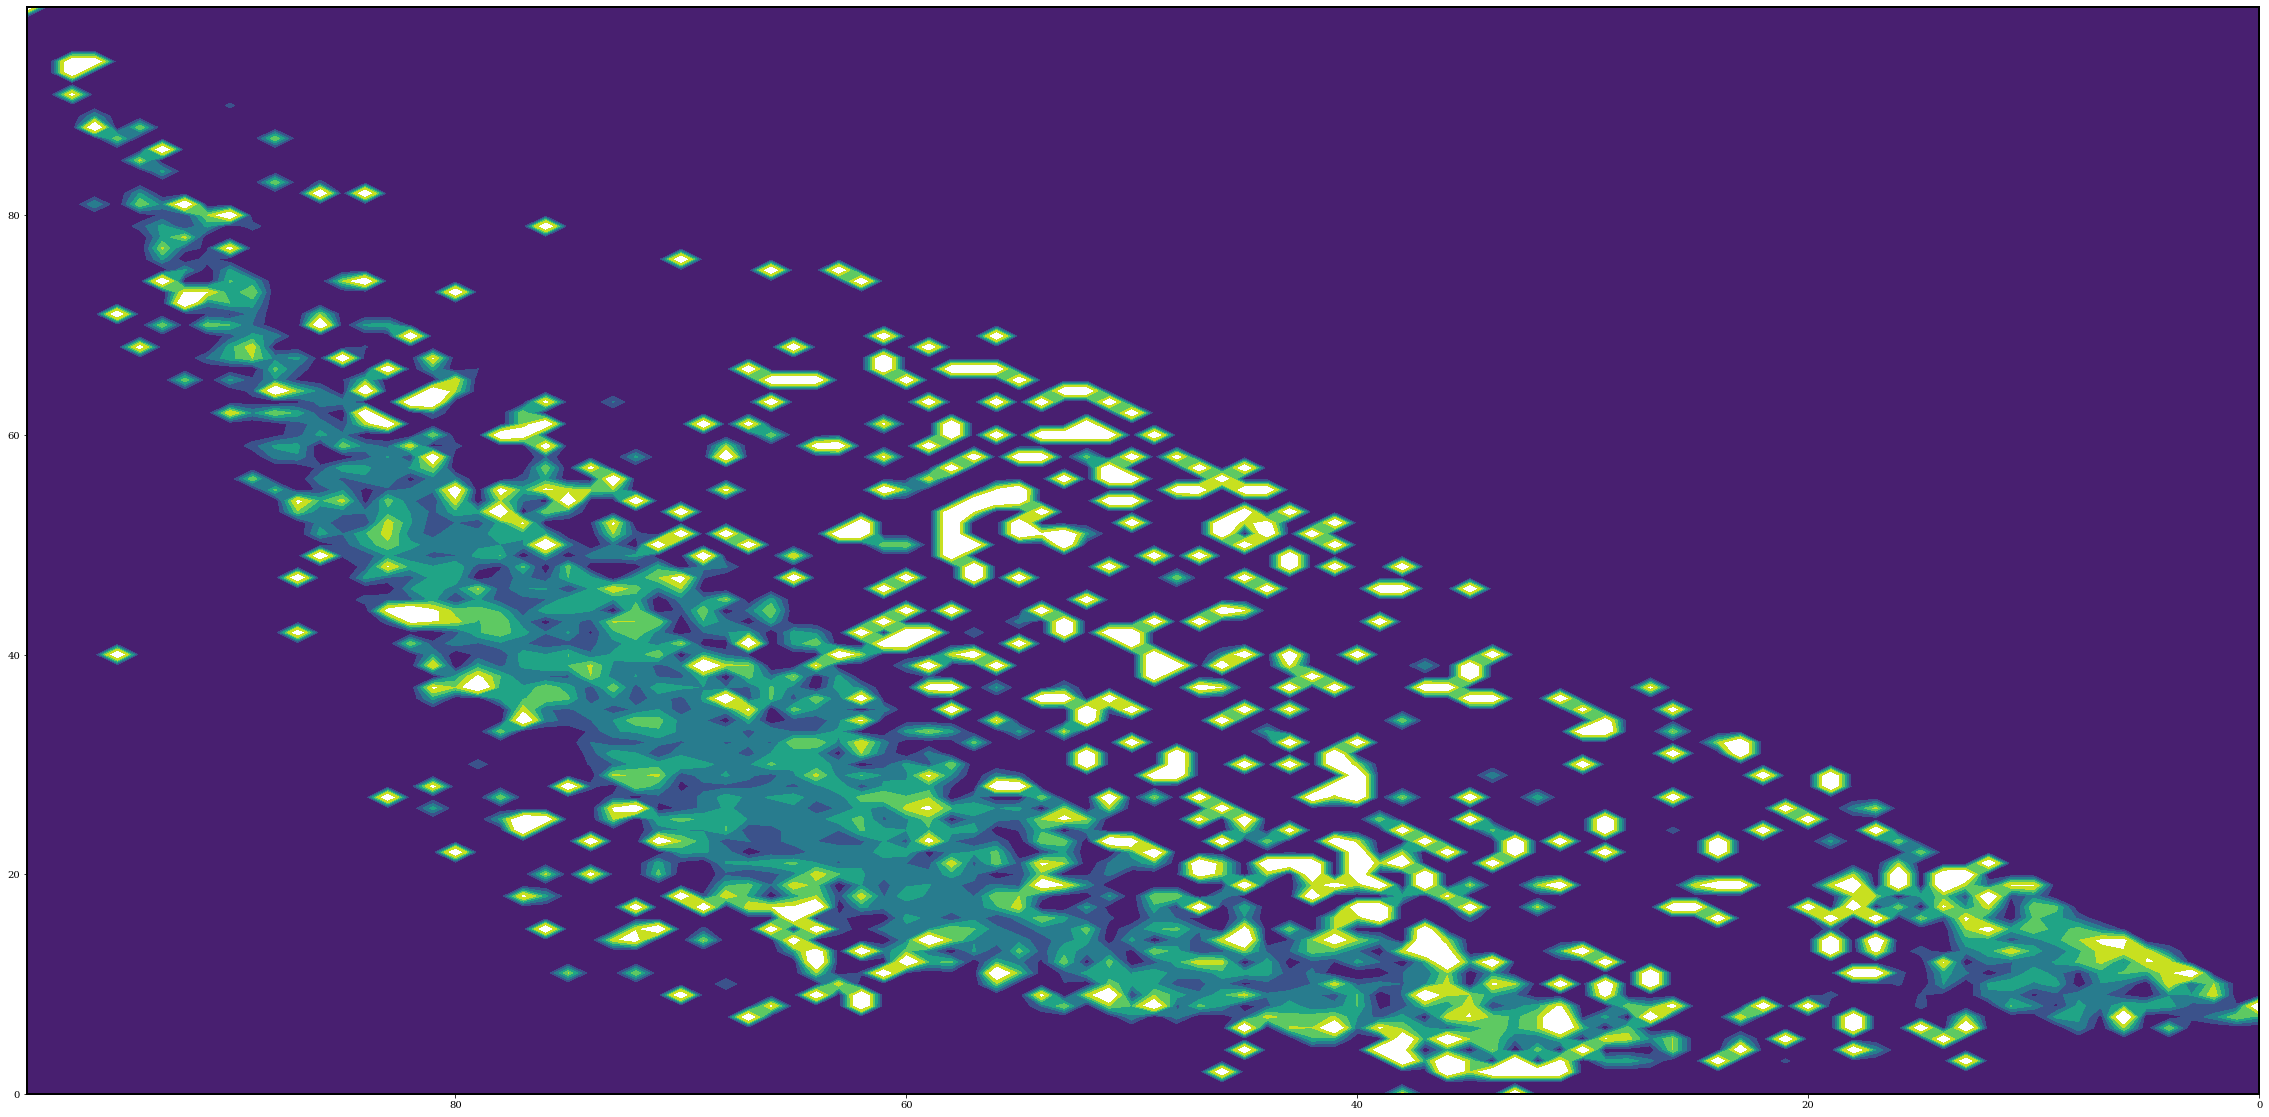

In [56]:
plt.figure(figsize=(40,20))
plt.contourf(values.T, levels=[0,0.1,0.2,0.3,0.4,0.5,0.6])
plt.xlim(99,0)

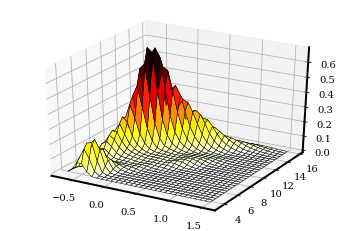

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from scipy import stats

X = BPMagS-RPMagS
Y = GmagS
Z = probaS

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:30j, 3.494659251413365:15.58897746042643:30j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
plt.show()

#create grid 

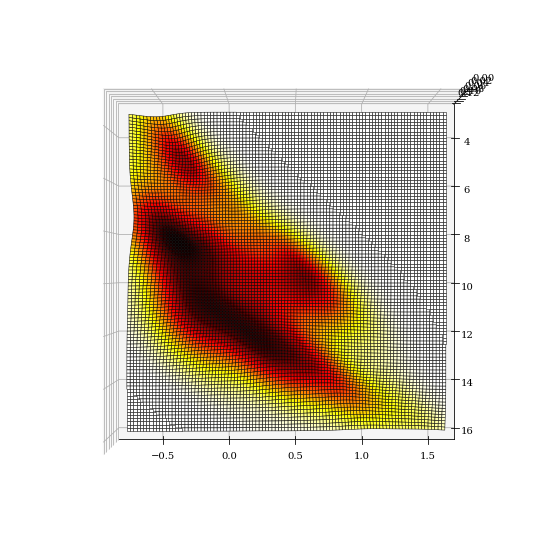

In [18]:
X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
plt.show()

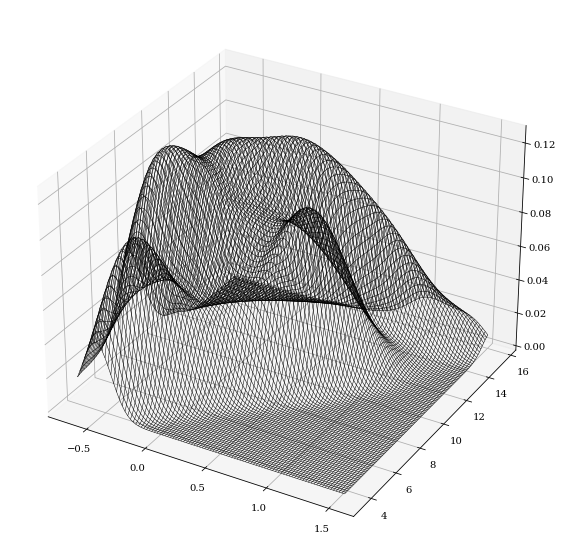

In [8]:



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_wireframe(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
plt.show()

<IPython.core.display.Javascript object>


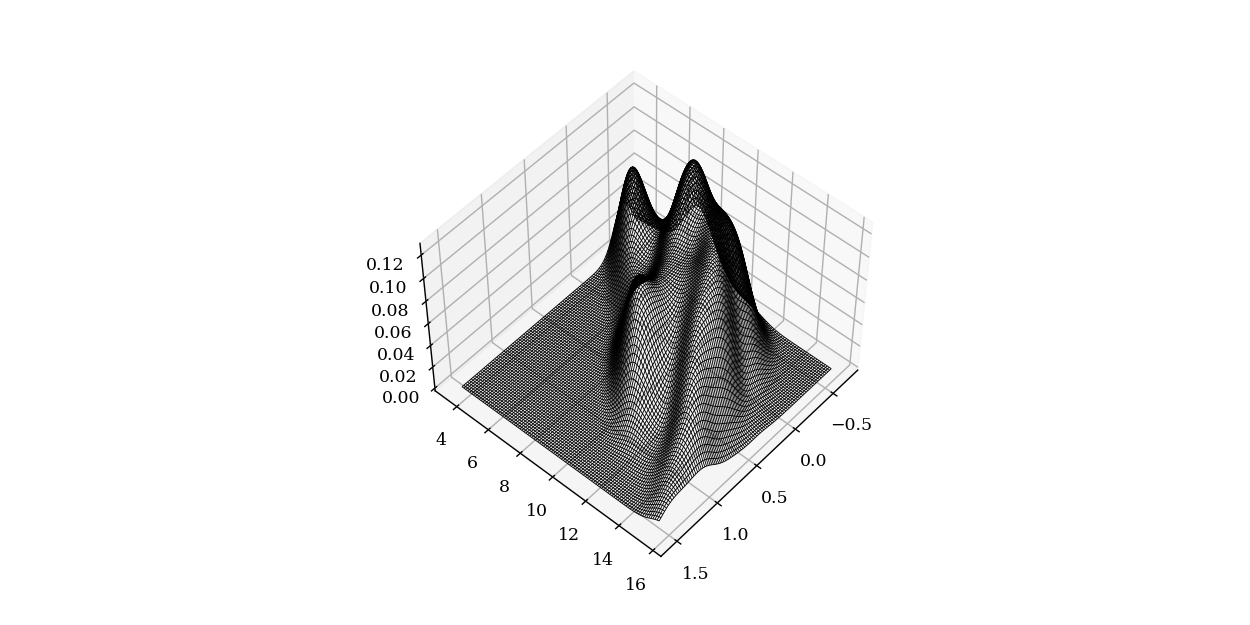

In [20]:



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_wireframe(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
plt.show()

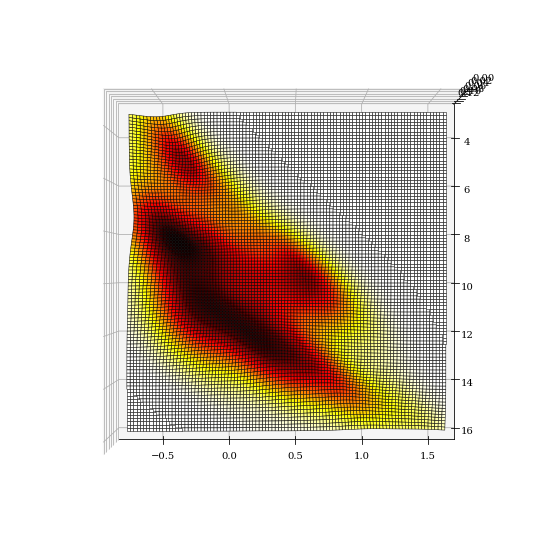

In [6]:
X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
plt.show()

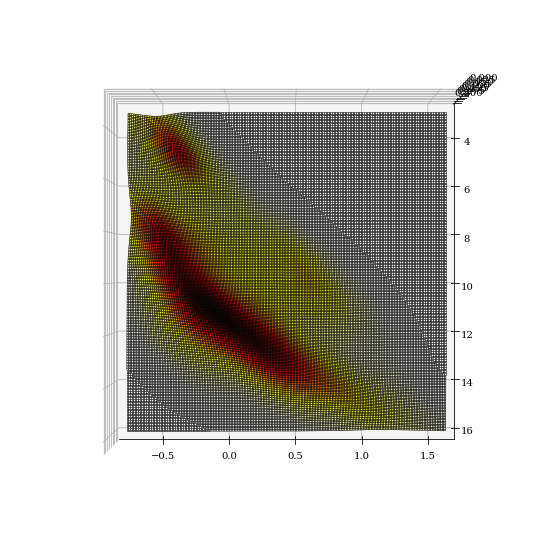

In [16]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

values = np.nan_to_num(avgarr, nan=0.0)



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),200), np.linspace(min(Y),max(Y),200))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:200j, 3.494659251413365:15.58897746042643:200j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
plt.show()

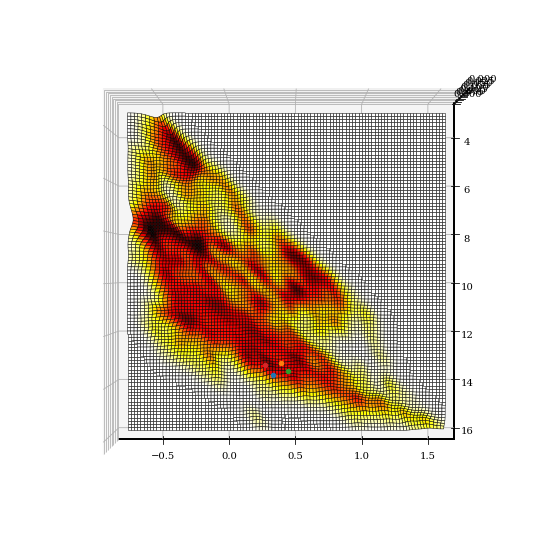

In [25]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

values = np.nan_to_num(avgarr, nan=0.0)



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), bw_method=0.1,weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
ax.scatter([0.338],[13.46],[0],'b*')
ax.scatter([17.582787-17.189125],[13.037749],[0],'r*')
ax.scatter([17.673635-17.231398],[13.3344736],[0], 'g*')
ax.scatter([0.287],[13.10],[0],'k*')
#plt.savefig('TessHeatmap+DAHe.pdf')
plt.show()

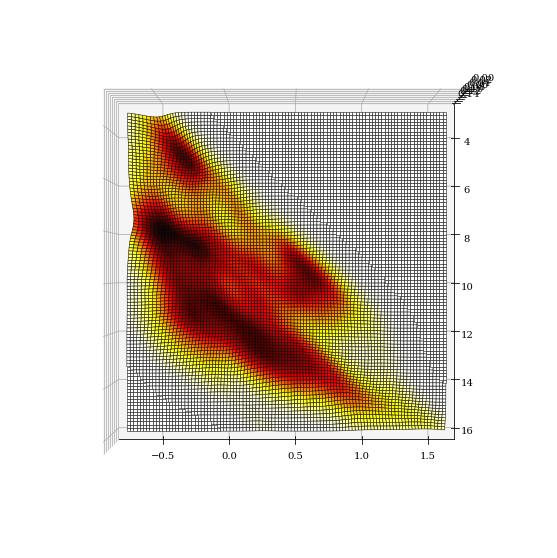

In [21]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

values = np.nan_to_num(avgarr, nan=0.0)



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), bw_method=0.2,weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
plt.show()

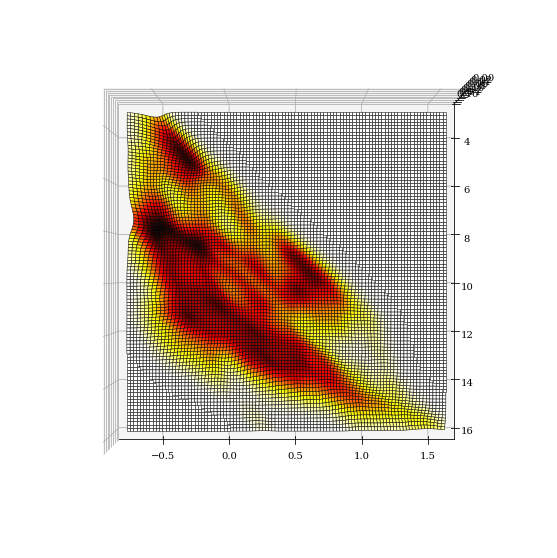

In [22]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

values = np.nan_to_num(avgarr, nan=0.0)



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), bw_method=0.15,weights=Z)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
ax.view_init(270, 270)
plt.show()

<IPython.core.display.Javascript object>


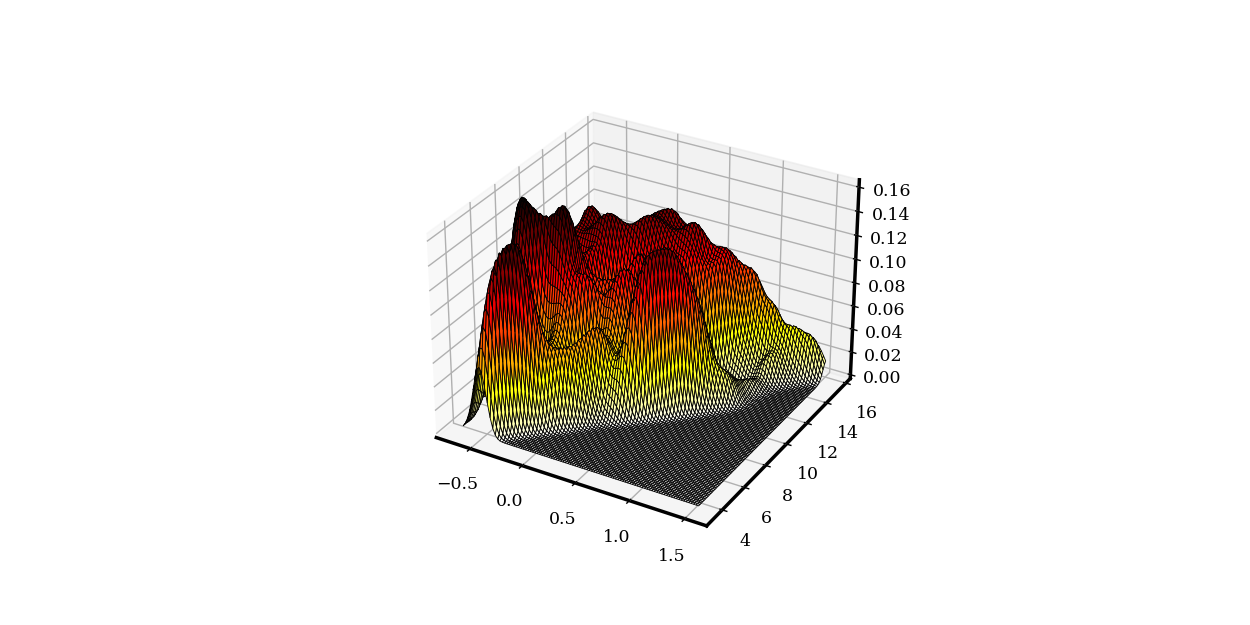

In [8]:
x = BPMagS-RPMagS
y = GmagS
H = probaS

#Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
H = np.rot90(H) 
H = np.flipud(H)

# xedges, yedges as returned by 'histogram2d'

# create an array for the output quantities
avgarr = np.zeros((nbins, nbins))

# determine the X and Y bins each sample coordinate belongs to
xbins = np.digitize(x, xedges[1:-1])
ybins = np.digitize(y, yedges[1:-1])

# calculate the bin sums (note, if you have very many samples, this is more
# effective by using 'bincount', but it requires some index arithmetics
for xb, yb, v in zip(xbins, ybins, probaS):
    avgarr[yb, xb] += v

# replace 0s in H by NaNs (remove divide-by-zero complaints)
# if you do not have any further use for H after plotting, the
# copy operation is unnecessary, and this will the also take care
# of the masking (NaNs are plotted transparent)
divisor = H.copy()
divisor[divisor==0.0] = np.nan

# calculate the average
avgarr /= divisor

values = np.nan_to_num(avgarr, nan=0.0)



X = BPMagS-RPMagS
Y = GmagS
Z = probaS
x,y = np.meshgrid(np.linspace(min(X),max(X),100), np.linspace(min(Y),max(Y),100))
xx = x.flatten()
yy = y.flatten()
zz = values.flatten()
X = xx
Y = yy
Z = zz

kernel = stats.gaussian_kde(np.array([X, Y]), bw_method=0.15,weights=Z)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")
xs, ys = np.mgrid[-0.671:1.5347:100j, 3.494659251413365:15.58897746042643:100j]
zs = kernel(np.array([xs.ravel(), ys.ravel()])).reshape(xs.shape)
ax.plot_surface(xs, ys, zs, cmap="hot_r", lw=0.5, rstride=1, cstride=1, ec='k')
plt.show()

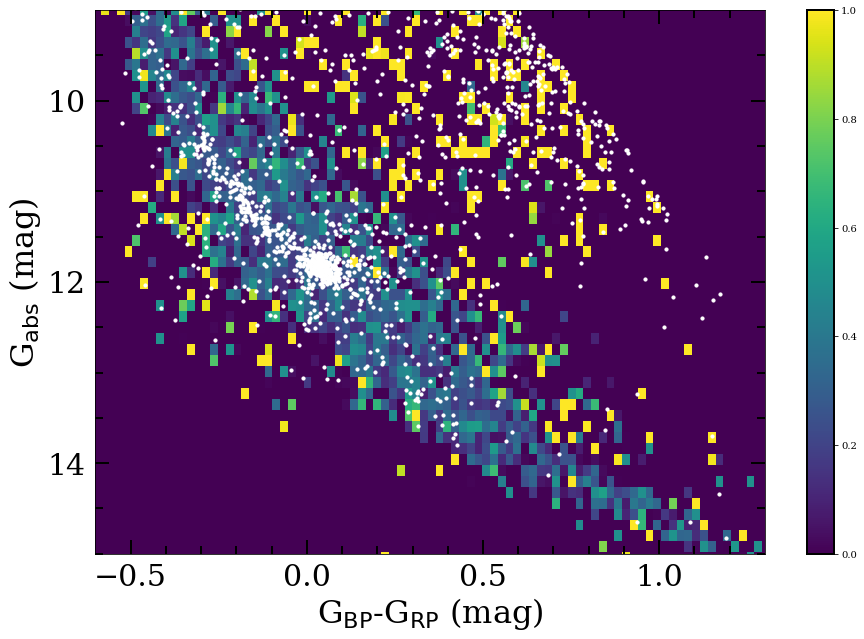

In [28]:
fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']


c = axs.pcolormesh(xedges,yedges,values)
fig.colorbar(c, ax=axs)

axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 


#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])



HRD1 = pd.read_csv('forHRTESSFilled1.csv',sep=',',header=None)
#proba = HRD[8].to_numpy()
#print(np.argwhere(np.isnan(proba)))
HRDAvail = HRD1[HRD1[9] == 'VARIABLE']
Parallax1 = HRDAvail[3].to_numpy()
Gmag1 = HRDAvail[4].to_numpy()
BPmag1 = HRDAvail[5].to_numpy()
RPmag1 = HRDAvail[6].to_numpy()
Gmag1 = Gmag1 + 5*(np.log10(Parallax1/1000)+1)

axs.scatter(BPmag1-RPmag1, Gmag1, marker='.',c='white',s=40)
np.save('BPRPGaiaVariable.npy', BPmag1-RPmag1)
np.save('GmagGaiaVariable.npy', Gmag1)
#plt.ylim(18,6)
#axs.plot([0.338],[13.46],'r*', ms=20)
#axs.plot([17.582787-17.189125],[13.037749],'r*', ms=20)
#axs.plot([17.673635-17.231398],[13.3344736], 'r*', ms=20)
#axs.plot([0.287],[13.10],'r*',ms=20)
#1252 gmag = 17.4550, bp=17.6113, rp=17.2011, par=12.8619
#axs.plot([17.6113-17.2011],[17.4550+ 5*(np.log10(12.8619/1000)+1)],'r*',ms=20)
#lp par=18.9865,gmag=16.8881,bp=16.9889,rp=16.6748
#axs.plot([16.9889-16.6748],[16.8881+ 5*(np.log10(18.9865/1000)+1)], 'r*',ms=20)
bboxx = transforms.Bbox([[0.66, 0.06], [14., 8.9]])#285->288 #15.15->
#plt.savefig('Tess+Gaia.pdf', bbox_inches=bboxx ) 

<IPython.core.display.Javascript object>


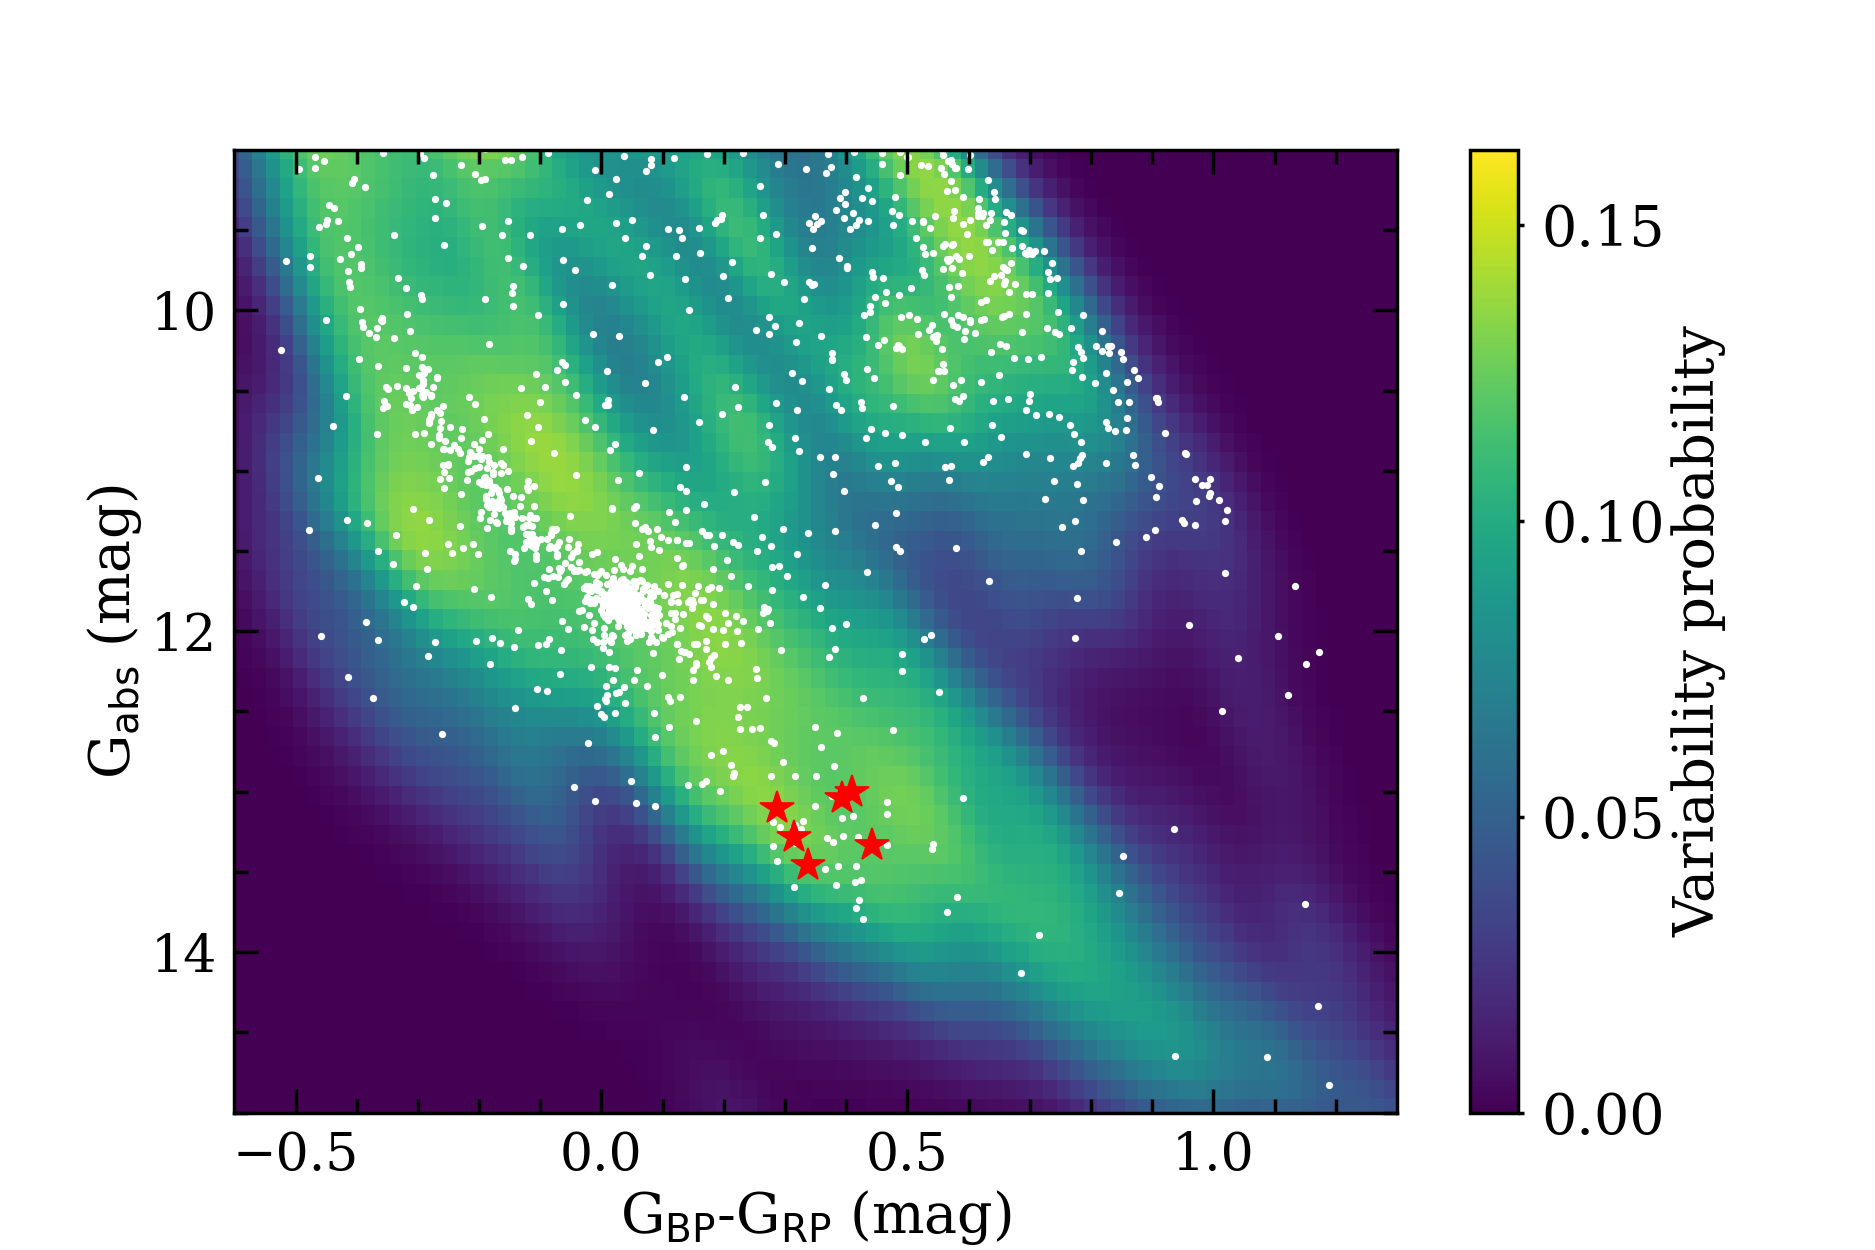

In [9]:



fig, axs = plt.subplots(1, 1,figsize=(15,10))
from pylab import *
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
rc('axes', linewidth=2)
rcParams["axes.axisbelow"] = False
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']


c = axs.pcolormesh(xs, ys, zs)
cb = fig.colorbar(c, ax=axs)#, label='Variability probability')
cb.ax.tick_params(axis='y', which='major', labelsize=32)
cb.ax.tick_params(axis='y',which='major', width=2,direction="out",pad=10)
cb.ax.set_ylabel('Variability probability', fontsize=32)
cb.ax.yaxis.set_major_locator(MultipleLocator(0.05))
axs.set_ylim(15,9)
axs.set_xlim(-0.6,1.2999)
axs.set_ylabel(r"G$_{\rm abs}$ (mag)", fontsize=32)
#axs.set_ylabel(r"$M_G = G + 5\times{\rm log}\bar{\omega} - 10$ (mag)", fontsize=32)
axs.set_xlabel(r"G$_{\rm BP}$-G$_{\rm RP}$ (mag)", fontsize=32)

axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_major_locator(MultipleLocator(0.06))
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in",zorder=100)
axs.tick_params(axis='x',which='both', width=2,direction='in',zorder=100)
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10,zorder=100)
axs.yaxis.set_major_locator(MultipleLocator(2))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(axis='x',which='minor', length=8,zorder=100)
axs.tick_params(axis='y',which='minor', length=8,direction='in',zorder=100)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 


#axs.plot([-0.5,0,0.5,1.5],[6,10,12,15])



HRD1 = pd.read_csv('forHRTESSFilled1.csv',sep=',',header=None)
#proba = HRD[8].to_numpy()
#print(np.argwhere(np.isnan(proba)))
HRDAvail = HRD1[HRD1[9] == 'VARIABLE']
Parallax1 = HRDAvail[3].to_numpy()
Gmag1 = HRDAvail[4].to_numpy()
BPmag1 = HRDAvail[5].to_numpy()
RPmag1 = HRDAvail[6].to_numpy()
Gmag1 = Gmag1 + 5*(np.log10(Parallax1/1000)+1)

axs.scatter(BPmag1-RPmag1, Gmag1, marker='.',c='white',s=40)
#plt.ylim(18,6)
axs.plot([0.338],[13.46],'r*', ms=20)
axs.plot([17.582787-17.189125],[13.037749],'r*', ms=20)
axs.plot([17.673635-17.231398],[13.3344736], 'r*', ms=20)
axs.plot([0.287],[13.10],'r*',ms=20)
#1252 gmag = 17.4550, bp=17.6113, rp=17.2011, par=12.8619
axs.plot([17.6113-17.2011],[17.4550+ 5*(np.log10(12.8619/1000)+1)],'r*',ms=20)
#lp par=18.9865,gmag=16.8881,bp=16.9889,rp=16.6748
axs.plot([16.9889-16.6748],[16.8881+ 5*(np.log10(18.9865/1000)+1)], 'r*',ms=20)
bboxx = transforms.Bbox([[0.66, 0.06], [16., 8.9]])#285->288 #15.15->
#plt.savefig('Tess+Gaia+DAhe.pdf', bbox_inches=bboxx ) 